In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [38]:
all_files = os.listdir('data')
most_recent_file = all_files[-1] # most recent file will be last alphabetically

table = pd.read_csv('data/' + most_recent_file)

table['error x (cm)'] = table['target x (cm)'] - table['actual x (cm)']
table['error y (cm)'] = table['target y (cm)'] - table['actual y (cm)']

# print(table)

Text(0, 0.5, 'y (cm)')

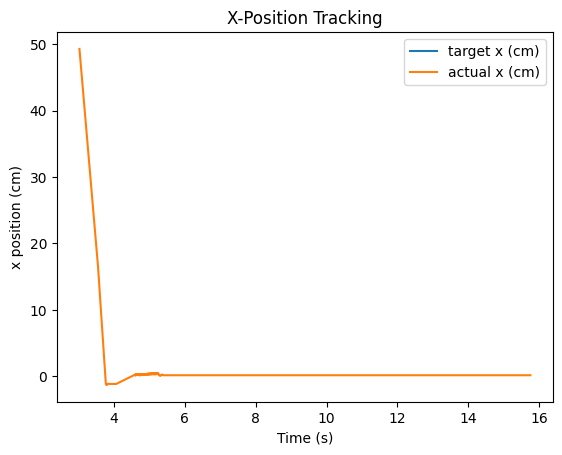

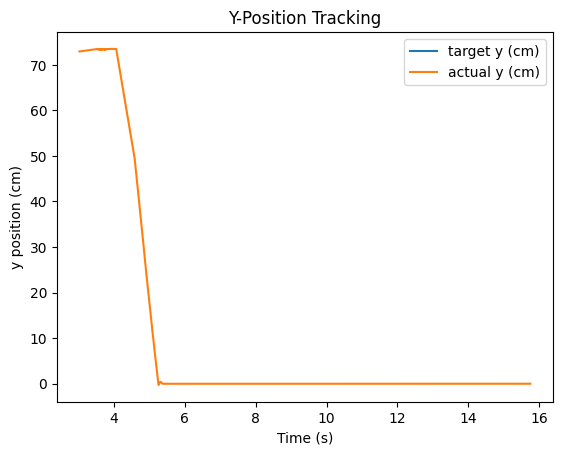

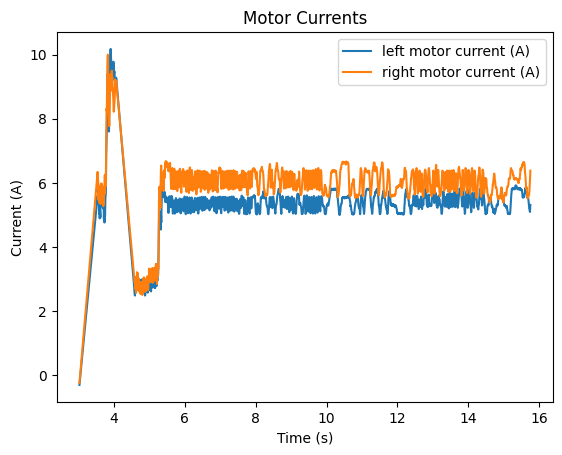

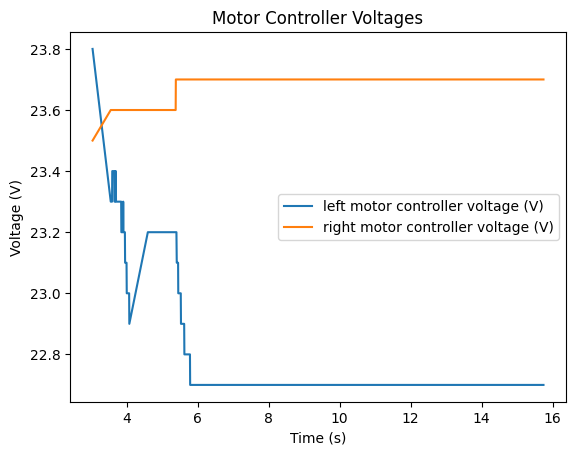

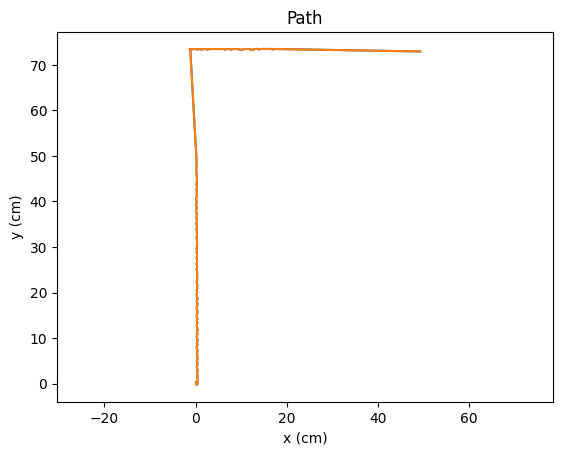

In [39]:
plt.figure()
plotted_values = ['target x (cm)', 'actual x (cm)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val])

plt.legend(plotted_values)
plt.title('X-Position Tracking')
plt.xlabel('Time (s)')
plt.ylabel('x position (cm)')

plt.figure()
plotted_values = ['target y (cm)', 'actual y (cm)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val])

plt.legend(plotted_values)
plt.title('Y-Position Tracking')
plt.xlabel('Time (s)')
plt.ylabel('y position (cm)')

plt.figure()
plotted_values = ['left motor current (A)', 'right motor current (A)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val])

plt.legend(plotted_values)
plt.title('Motor Currents')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

plt.figure()
plotted_values = ['left motor controller voltage (V)', 'right motor controller voltage (V)']

for val in plotted_values:
    plt.plot(table['time (s)'], table[val])

plt.legend(plotted_values)
plt.title('Motor Controller Voltages')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

plt.figure()
plotted_values = ['actual x (cm)', 'actual y (cm)']

for val in plotted_values:
    plt.plot(table['actual x (cm)'], table['actual y (cm)'])

plt.axis('equal')
plt.title("Path")
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
# plt.legend(plotted_values)
